**Perceptron**

**Naive Bayes Classifier**

LDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
#Loading the dataset (path to different dataset can also be specified)
def load_data(arg):
    #Takes input as path to dataset, if you want to use default dataset give empty string ''
    if arg == '':
        data = pd.read_csv('dataset_FLD.csv', header = None)
    else:
        data = pd.read_csv(arg)
    n,f = data.shape
    
    # Splitting into the given classes
    X_1 = data[data[3] == 0].to_numpy()
    n1 = X_1.shape[0]
    X_2 = data[data[3] == 1].to_numpy()
    n2 = n - n1
    Y_1 = X_1[:,3].reshape(n1,1)
    X_1 = X_1[:, 0:3]
    Y_2 = X_2[:,3].reshape(n2,1)
    X_2 = X_2[:, 0:3]
    
    return X_1, X_2, Y_1, Y_2

def normal_dist(x , mean , sd):
    prob_density = (1/(sd*(2*np.pi)**0.5)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [ ]:
#Ficher's Discriminant analysis class module
class FDA:
    
    #init function describing the required parameters
    def __init__(self, X1, X2, Y1, Y2):
        self.X1 = X1
        self.X2 = X2
        self.Yp = np.concatenate((Y1,Y2), axis = 0)
        #W = A plane perpendicular to discriminating plane ,i,e, parallel to separation of means
        self.W = np.zeros((np.shape(X1[1])))
        #threshold obtained
        self.thresh = 0
        #mean of projected class 1
        self.m1 = 0
        #mean of projected class 2
        self.m2 = 0
        #Std of projected class 1
        self.s1 = 0
        #Std of projected class 2
        self.s2 = 0
        #number of points in class 1
        self.n1 = 0
        #number of points in class 2
        self.n2 = 0
        
        
    def split(self):
        
        #Parameters needed to calculate the W vector (Linear discriminant)
        X1_mean = np.mean(self.X1, axis = 0)
        self.n1 = X1.shape[0]
        
        X2_mean = np.mean(self.X2, axis = 0)
        self.n2 = X2.shape[0]
        
        S1 = np.matmul((self.X1 - X1_mean).T, (self.X1 - X1_mean))
        S2 = np.matmul((self.X2 - X2_mean).T, (self.X2 - X2_mean))
        
        #Within class scatter matrix
        Sw = (S1/self.X1.shape[0] + S2/self.X2.shape[0])
        
        #Discriminant line
        W = np.matmul(np.linalg.inv(Sw), (X1_mean - X2_mean).T)
        W = W.reshape(3,1)
        #Considering a unit a vector along discriminating line
        self.W = W
        print("W :")
        print(self.W/np.linalg.norm(self.W))
        
        Xpts = np.concatenate((self.X1, self.X2), axis = 0)
        
        proj = np.matmul(self.W.T, Xpts.T)
        #Class 1 points
        X1_p = proj[:,:self.n1]
        #Class 2 points
        X2_p = proj[:,self.n2:]
        #Taking X axis as the reference and plotting the projections
        l = np.zeros((proj.shape))
        #mean of class 1
        m1 = np.mean(X1_p)
        self.m1 = m1
        #mean of class 2
        m2 = np.mean(X2_p)
        self.m2 = m2
        #standard deviation of class 1
        s1 = np.std(X1_p)
        self.s1 = s1
        #Standard deviation of class 2
        s2 = np.std(X2_p)
        self.s2 = s2
        
        #Finding the threshold
        a = 1/(2*s1**2) - 1/(2*s2**2)
        b = m2/(s2**2) - m1/(s1**2)
        c = m1**2 /(2*s1**2) - m2**2 / (2*s2**2) - np.log(s2/s1)
        roots = np.roots([a,b,c])
        print("Intersection of Gaussians: ") 
        print(roots)
        root = min(roots) #in our case the root is the minimum amongst the two obtained
        self.thresh = root
        print("The threshold of after projecting on discriminant hyperplane is " + str(root))
        
        return self.W, Xpts
    
    def plot_points(self,Xpts):
        
        fig = plt.figure()
        ax = Axes3D(fig) #Create a 3d grid
        #Plotting class 1 cluster
        ax.scatter(Xpts[:self.n1,0], Xpts[:self.n1,1], Xpts[:self.n1,2], c ='r', marker = 'v')
        #Plotting class 2 cluster
        ax.scatter(Xpts[self.n2:,0], Xpts[self.n2:,1], Xpts[self.n2:,2], c ='b', marker = 'o')
        #plotting the discriminating hyperplane
        xpt, ypt = np.meshgrid(np.linspace(-10,10,50), np.linspace(-3,3,50))
        #Zpoints on the hyperplane
        zpt = (self.thresh - xpt - ypt)/self.W[2]
        ax.scatter(xpt, ypt, zpt, alpha = 0.1,c='purple')
        #Best angle to see whether the plane separates the two classes or not (can be altered 10-50, -10-20 gives the best result)
        ax.view_init(10,0)
        
        plt.show()
        
        return
    
    def plot_discriminant(self): #Plotting the discriminant line in 3D 
        
        pts = np.linspace(0, 500, 1000)
        xpt, ypt = np.meshgrid(range(50), range(50))
        zpt = (self.thresh - xpt - ypt)/self.W[2]
        fig2 = plt.figure()
        ax1 = Axes3D(fig2)
        ax1.scatter(xpt, ypt, zpt, c='r', depthshade = 'False')
        
        plt.show()
        
        return
    
    def plot_projections(self, Xpts): #Plotting projections of each class as well as plot of their normal distributions
        
        proj = np.matmul(self.W.T, Xpts.T)
        #Class 1 points
        X1_p = proj[:,:self.n1]
        #Class 2 points
        X2_p = proj[:,self.n2:]
        #Taking X axis as the reference and plotting the projections
        l = np.zeros((proj.shape))
        #mean of class 1
        m1 = self.m1
        #mean of class 2
        m2 = self.m2
        #standard deviation of class 1
        s1 = self.s1
        #standard deviation of class 2
        s2 = self.s2
        
        #plotting Projections
        plt.subplot(1,1,1)
        plt.scatter(proj[:,:500], l[:,:500], c='r', s=5)
        plt.scatter(proj[:,500:], l[:,500:], c='b', s=5)
        #plotting the threshold
        yp = np.linspace(-2,2,50)
        xp = np.ones((yp.shape[0],1))*self.thresh
        plt.scatter(xp, yp, c = 'orange', s = 5)
        plt.show()
        
        #PLotting distributions
        plt.subplot(1,1,1)
        x1 = np.linspace(-10,50, 100)
        x2 = np.linspace(-50, 10, 100)
        plt.plot(x1, normal_dist(x1, m1, s1), 'r')
        plt.plot(x2, normal_dist(x2, m2, s2), 'b')
        plt.show()
    
        return
    
    def accuracy(self, Xpts):
        test = np.concatenate((Xpts, self.Yp), axis =1)
        np.random.shuffle(test)
        Xp = test[:,0:3]
        Yp = test[:,3]
        res = (np.matmul(W.T, Xp.T) < self.thresh)

        k = (res == Yp)
        acc = 1*k
        n = acc.shape[1]
        true_pos = acc.sum()
        print("Accuracy of the discriminant is " + str((true_pos/n)*100) + "%.")
        
        return 1*res


    
        
    
    
        

W :
[[ 0.00655686]
 [ 0.01823739]
 [-0.99981218]]
Intersection of Gaussians: 
[27.88647855  4.40693156]
The threshold of after projecting on discriminant hyperplane is 4.406931564733935


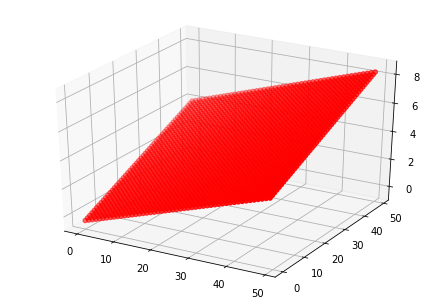

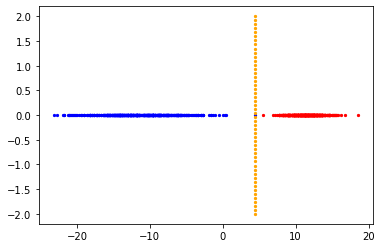

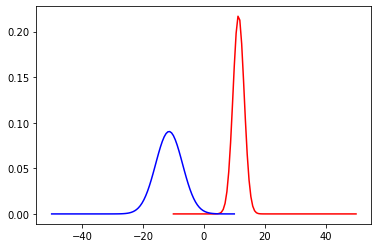

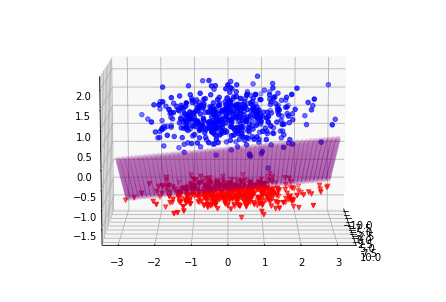

Accuracy of the discriminant is 100.0%.


In [ ]:
X1, X2, Y1, Y2 = load_data('')

f = FDA(X1, X2, Y1, Y2)

W, Xp = f.split()

f.plot_discriminant()

f.plot_projections(Xp)
f.plot_points(Xp)
r = f.accuracy(Xp)

In [ ]:
r

array([[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 